In [3]:
import skimage.io
import numpy as np

prefix = 'Curated Images/'

images = { 'filename':'recording1.czi - recording1.czi #03.tif', 'rounded':69, 'egress':76  }

img = skimage.io.imread(''.join([prefix,'recording1.czi - recording1.czi #03.tif']))

print img.shape


(124, 2, 512, 512)


[]


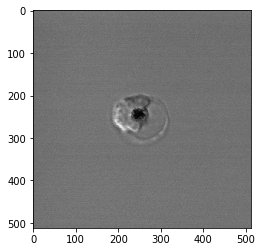

In [11]:
from skimage.feature import blob_log
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0,1,:,:],cmap='gray');
print(blob_log(img[0,1,:,:]))

In [28]:
from scipy.ndimage.measurements import center_of_mass

com = np.array([int(x) for x in center_of_mass(img[0,0,:,:])]).reshape(1,2)
print(com)
from skimage.segmentation import active_contour
from skimage.segmentation import random_walker

labels = random_walker(img[0,1,:,:], com, beta=10, mode='bf')
active_contour(img[0,1,:,:], com)                               

[[251 247]]


/Users/gu6/anaconda/envs/py27/lib/python2.7/site-packages/skimage/segmentation/random_walker_segmentation.py:361: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


array([[ 252.08785793,  250.17333602]])

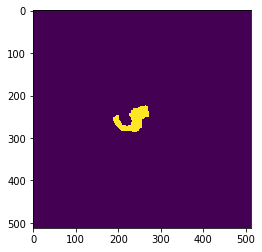

In [125]:
def cellmask_from_img(image):

    import numpy as np
    from skimage.morphology import binary_closing,binary_opening,binary_erosion,binary_dilation
    from skimage.filters import gaussian 
    from scipy.ndimage.filters import sobel
    from skimage.filters import threshold_otsu
    
    blurred_image = gaussian(image, sigma=0.0001)                             
    
    # simple sobel edge detector
    horizontal = sobel(blurred_image,0)
    vertical = sobel(blurred_image,1)
    edges = np.hypot(horizontal,vertical)
    
    # threshold edge image
    binary = magnitude > threshold_otsu(edges)
    
    #generate large circular mask
    r = 10
    y,x = np.ogrid[-r:r, -r:r]
    mask1 = x*x + y*y <= r*r
    
    #generate small circular mask
    r = 5
    y,x = np.ogrid[-r:r, -r:r]
    mask2 = x*x + y*y <= r*r
    
    # closing
    binary = binary_closing(binary,mask1)
    
    # opening
    binary = binary_opening(binary,mask2)

        
    return binary

plt.imshow(cellmask_from_img(image))


In [102]:
images = [
            { 'filename':'recording1.czi - recording1.czi #03.tif', 'rounded':69, 'egress':76, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #07.tif', 'rounded':95, 'egress':102, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #09.tif', 'rounded':109, 'egress':114, 'notes':'egress fail' },
            { 'filename':'recording1.czi - recording1.czi #12.tif', 'rounded':23, 'egress':28, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #13.tif', 'rounded':90, 'egress':100, 'notes':'egress fail' },
            { 'filename':'recording1.czi - recording1.czi #14.tif', 'rounded':8, 'egress':12, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #17.tif', 'rounded':73, 'egress':81, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #18.tif', 'rounded':9, 'egress':13, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #03.tif', 'rounded':61, 'egress':69, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #04.tif', 'rounded':38, 'egress':42, 'notes':'egress fail' },
            { 'filename':'recording2.czi - recording2.czi #05.tif', 'rounded':28, 'egress':40, 'notes':''},
            { 'filename':'recording2.czi - recording2.czi #06.tif', 'rounded':104, 'egress':110, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #09.tif', 'rounded':63, 'egress':69, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #11.tif', 'rounded':26, 'egress':31, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #14.tif', 'rounded':26, 'egress':33, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #15.tif', 'rounded':75, 'egress':82, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #17.tif', 'rounded':73, 'egress':78, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #18.tif', 'rounded':0, 'egress':6, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #20.tif', 'rounded':90, 'egress':96, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #10.tif', 'rounded':455, 'egress':463, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #12.tif', 'rounded':194, 'egress':198, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #13.tif', 'rounded':134, 'egress':139, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #16.tif', 'rounded':250, 'egress':254, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #19.tif', 'rounded':145, 'egress':151, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #20.tif', 'rounded':254, 'egress':259, 'notes':'' }
        ]
prefix = '../Curated Images/'

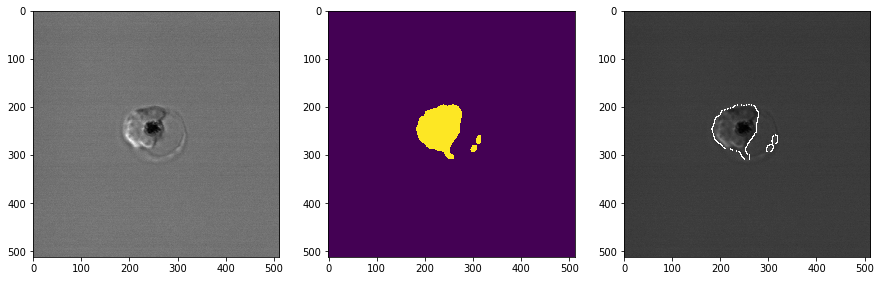

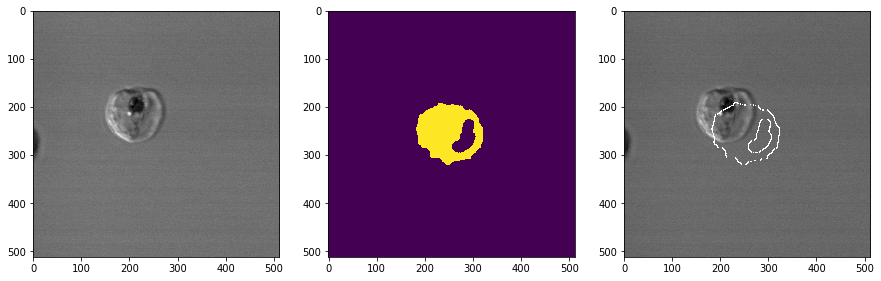

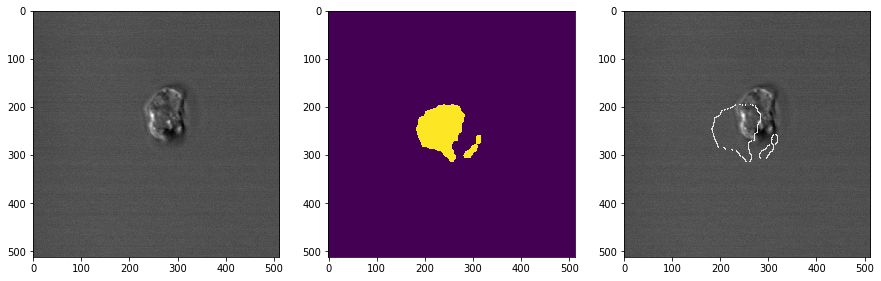

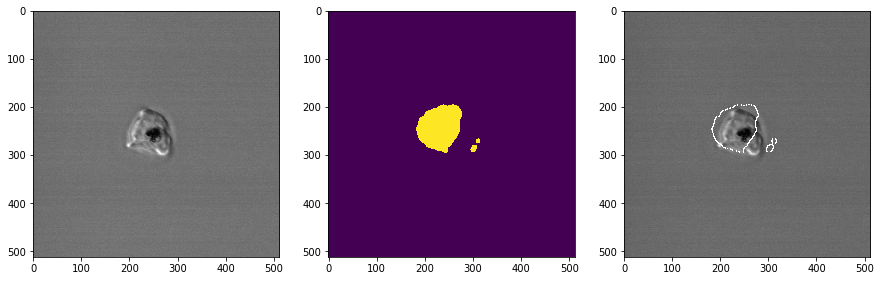

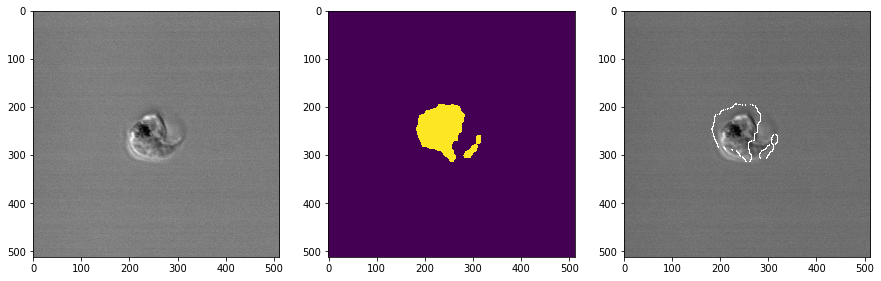

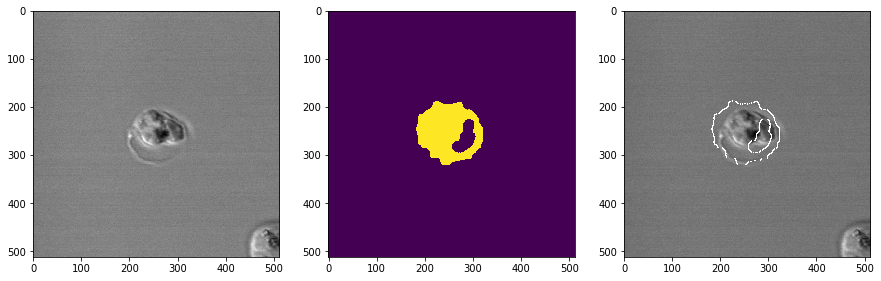

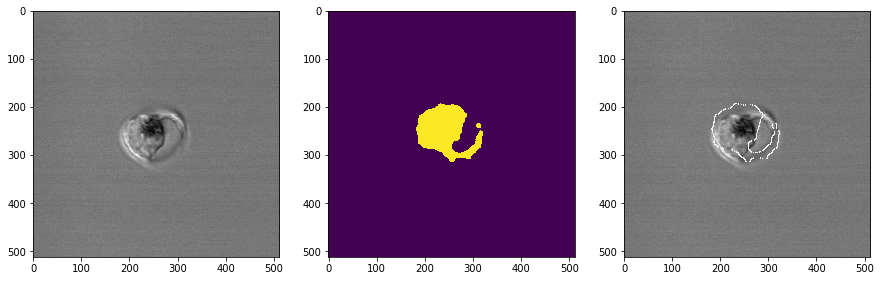

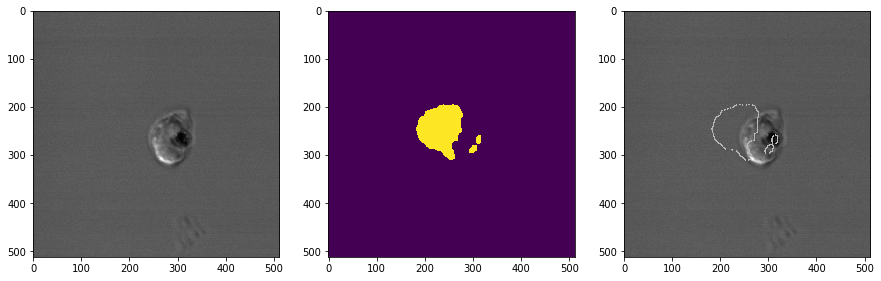

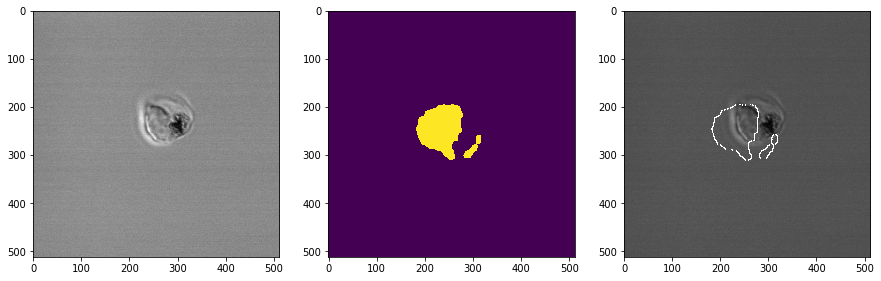

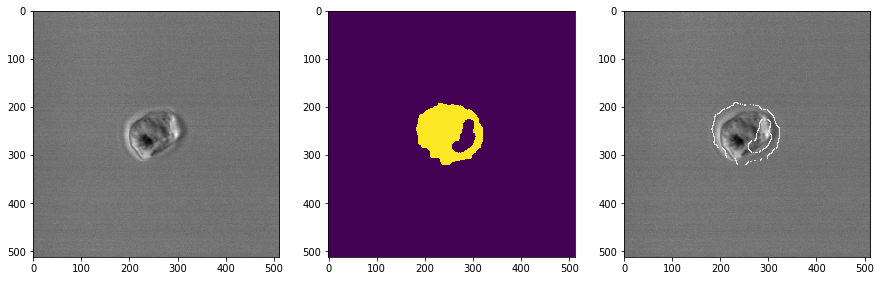

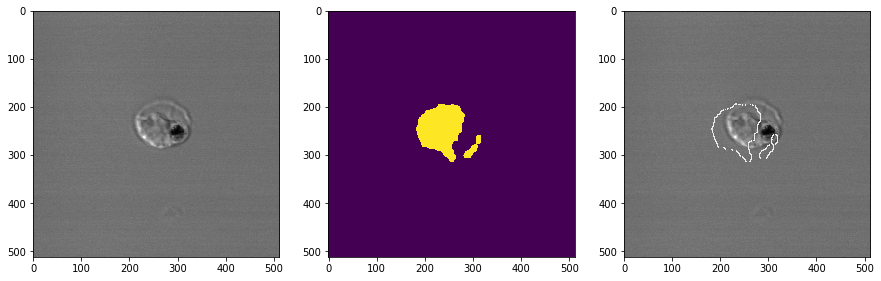

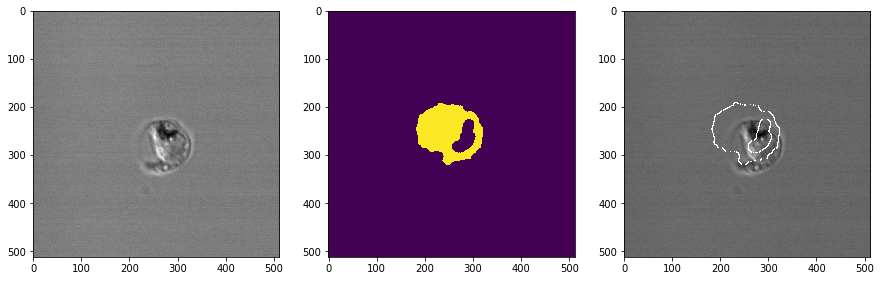

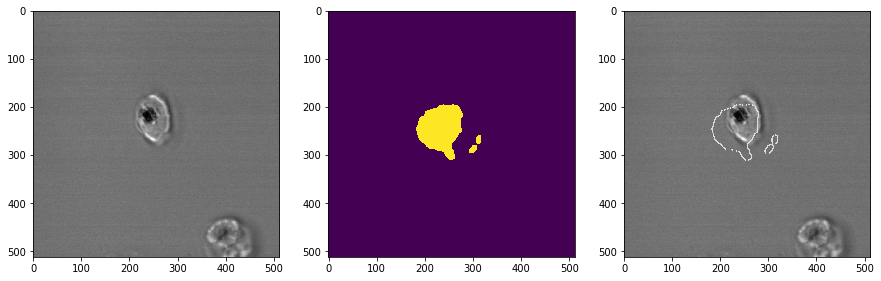

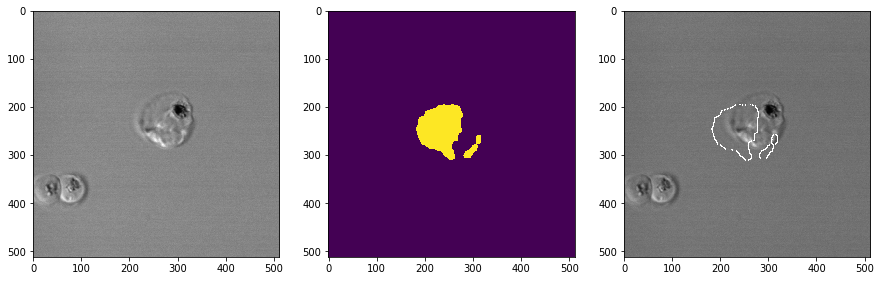

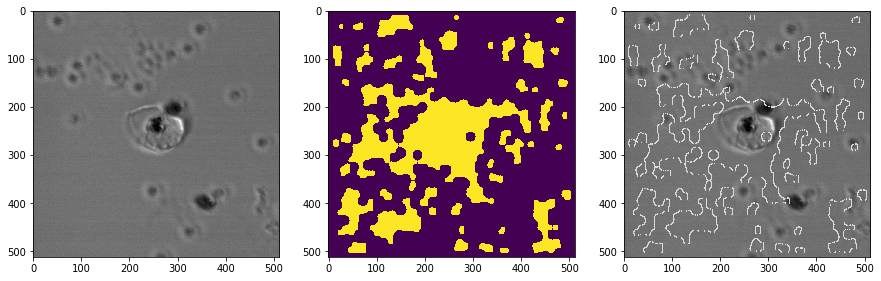

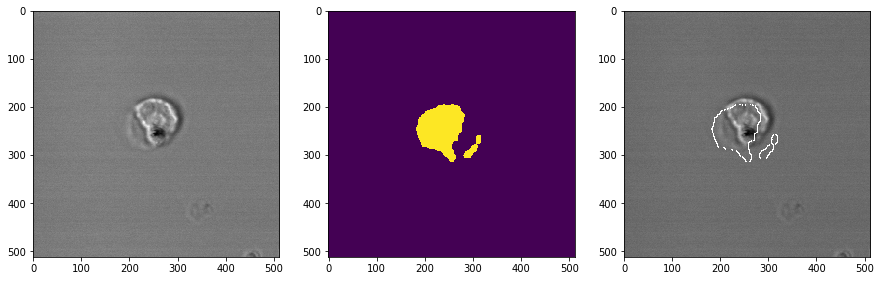

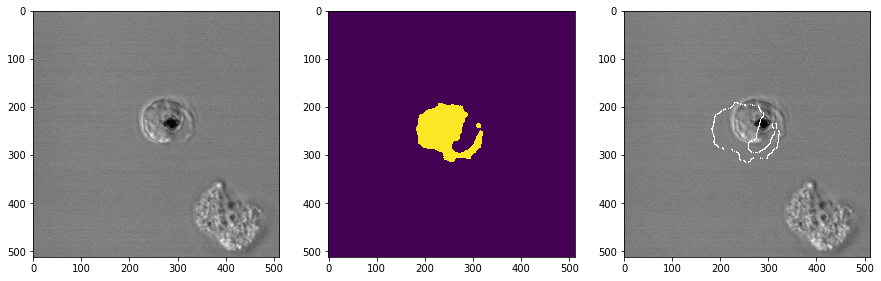

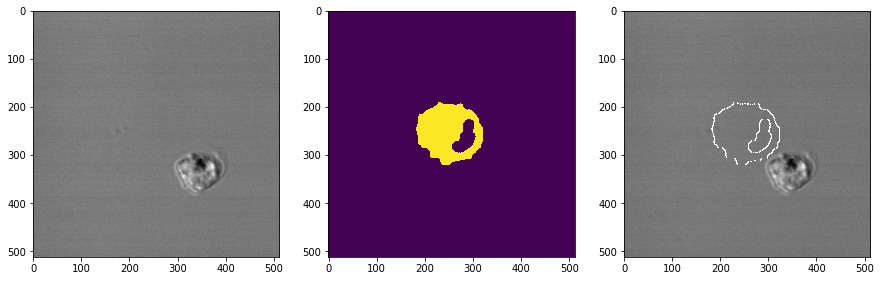

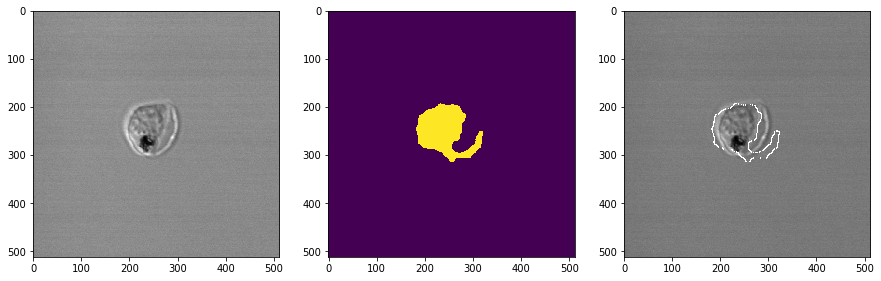

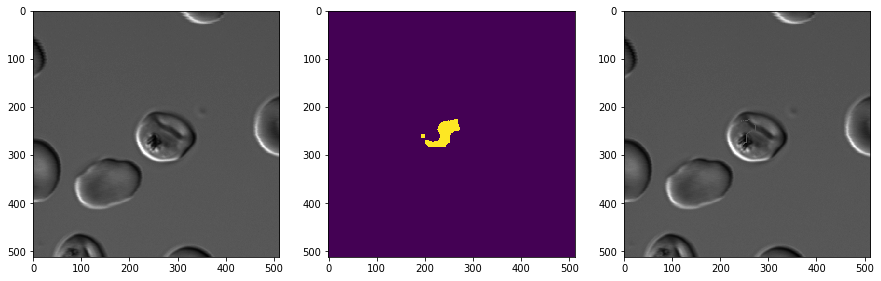

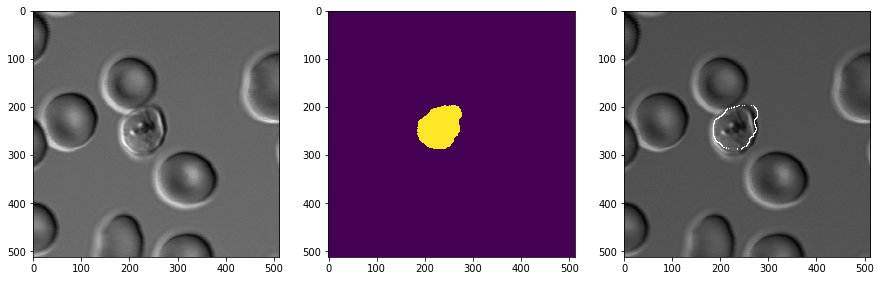

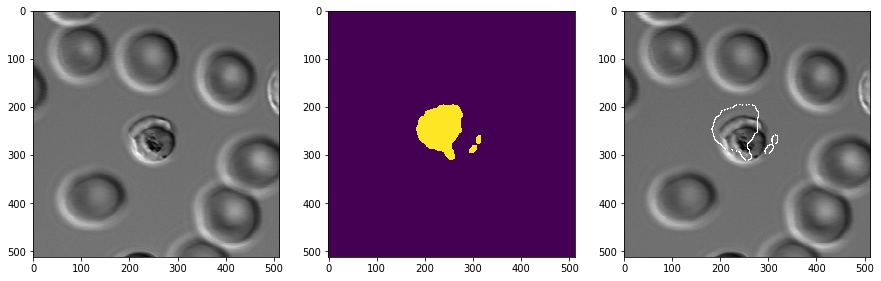

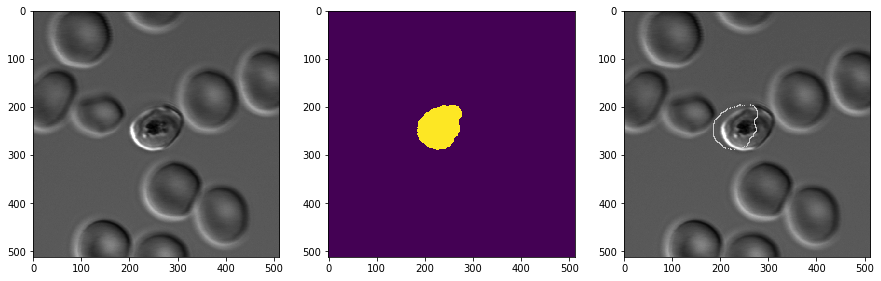

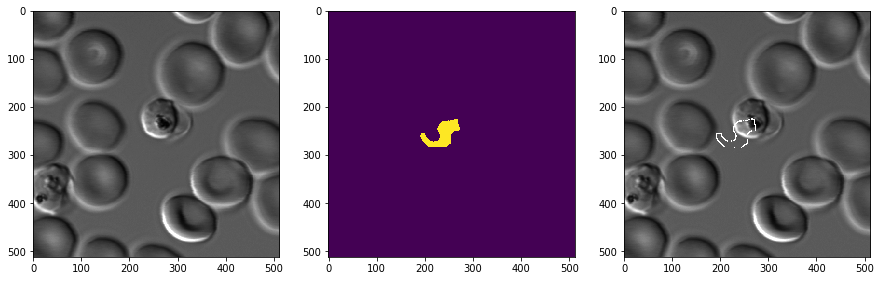

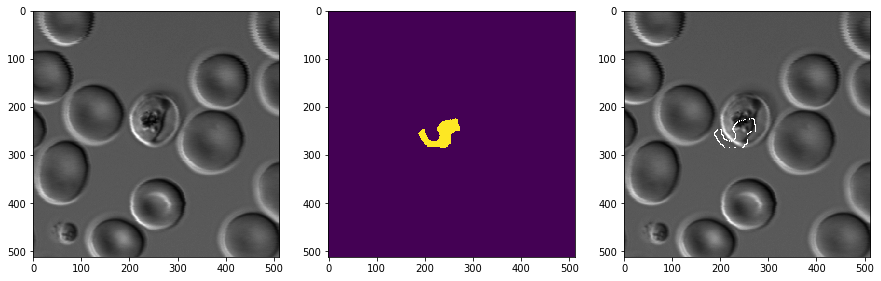

In [123]:
import gc

masks = []
for image_dict in images:
    m = np.max(image)
    img = skimage.io.imread(''.join([prefix,image_dict['filename']]))
    image = img[0,1,:,:]
    plt.figure(figsize= (15,5))
    plt.subplot(1,3,1)
    plt.imshow(image,cmap='gray')
    out = cellmask_from_img(image)
    edge = sobel(out) * m
    
    plt.subplot(1,3,2)
    
    plt.imshow(out)
    
    plt.subplot(1,3,3)
    plt.imshow(np.maximum(edge,image),cmap='gray')
    plt.show()
    gc.collect()

/Users/gu6/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  from ipykernel import kernelapp as app


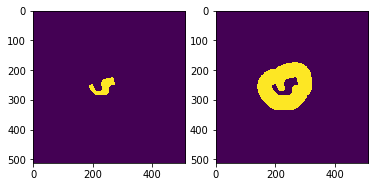

In [128]:
def get_donut(center_mask):
    
    # takes a mask and returns the donut mask around it
    
    import numpy as np
    from skimage.morphology import binary_dilation
    
    #generate circular mask for dilation
    r = 50
    y,x = np.ogrid[-r:r, -r:r]
    circle = x*x + y*y <= r*r
    
    total_mask = binary_dilation(center_mask,circle)
    donut_mask = total_mask - center_mask
    
    return donut_mask
    
mask1 = cellmask_from_img(image) 
plt.subplot(1,2,1)
plt.imshow(mask1)
plt.subplot(1,2,2)
plt.imshow(get_donut(mask1))

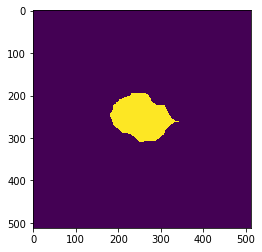

In [83]:
binary = binary_closing(binary,mask)
plt.figure()
plt.imshow(binary)

(250.84757118927973, 300.92127303182582)


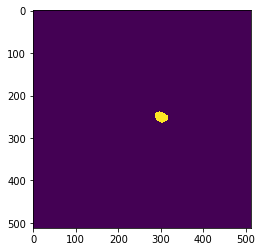

(365.57954545454544, 377.16098484848487)


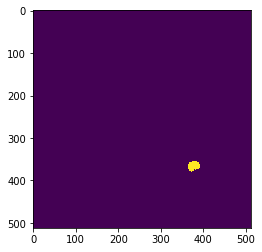

(433.80214723926383, 369.92944785276075)


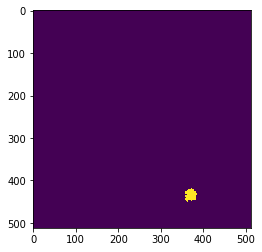

(247.66329966329965, 303.05387205387206)


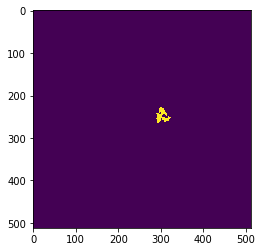

KeyboardInterrupt: 

In [124]:
import track_food_vacuole

find_centroid(img)
